# Test for Model Building

## 1 Creat a random price line based on Brownian motion

In [1]:
#ln(S(y+t)/S(y))~N(mu,sigma) 几何布朗运动


import matplotlib.pyplot as plt
import numpy as np

def Price(f=0.02,u=0,t=200):
    v = f*np.random.randn(t)+u
    P=[1]
    for i in range (t):
        P.append(P[i]*np.exp(v[i]))
    plt.plot(P)
    plt.show()
    return P

In [ ]:
import matplotlib.pyplot as plt
#随机价格变化曲线
plt.subplot(2,2,1)
Price()

#价格上升通道曲线
#plt.subplot(2,2,2)
#Price(u=0.01)

#价格下降通道曲线
#plt.subplot(2,2,3)
#Price(u=-0.01)

plt.show()

## 2 HMM

### 2.1 Find up-zone and down-zone

In [2]:
def Find_zone(t=500,n=400,hl=15):
    P = Price(t=t)
    Z = []
    for i in range (hl):
        Z.append(-1)

    for i in range (n-2*hl):
        if P[i+2*hl] >= P[i]:
            Z.append(0)
        else:
            Z.append(1)

    for i in range (hl,n-hl):
        if Z[i] == 0:
            plt.plot([i],[P[i]],'ro')
        elif Z[i] == 1:
            plt.plot([i],[P[i]],'go')
    plt.show()
    return P,Z

In [ ]:
P,Z = Find_zone(t=1000,hl=30)

### 2.2 Count Parameters

In [ ]:
# CM:    U    D        PM:   +    -
#     U  P1   P3          U  P1   P3
#     D  P2   P4          D  P2   P4

In [5]:
def f(x):
    if x >= 0:
        return 0
    else :
        return 1
def Count_Para(t=1000,n=800,hl=15):
    P,Z = Find_zone(t=t,n=n,hl=hl)
    CM = [[0,0],
          [0,0]]#转换矩阵
    PM = [[0,0],
          [0,0]]#概率矩阵

    for i in range (hl,n-hl-1):
        PM[Z[i]][f(P[i+1]-P[i])]+=1
        CM[Z[i]][Z[i+1]]+=1
        
    return PM,CM,P,Z

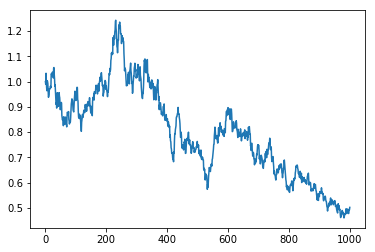

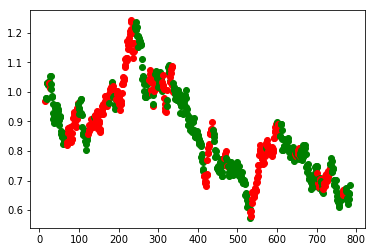

([[174, 144], [207, 244]], [[287, 31], [30, 421]])

In [6]:
Count_Para()

### 2.3 Optimization

In [ ]:
# CM:    U    D        PM:   +    -
#     U  P1   P3          U  P1   P3
#     D  P2   P4          D  P2   P4

In [16]:
def Viterbi(V,PM,CM):
    pi=[[1,1]]
    for i in range (1,len(V)):
        pi.append([0,0])
        if V[i] >= 0:
            pi[i][0]=PM[0][0]*max(pi[i-1][0]*CM[0][0],pi[i-1][1]*CM[1][0])
            pi[i][1]=PM[1][0]*max(pi[i-1][0]*CM[1][0],pi[i-1][1]*CM[1][1])
        else:
            pi[i][0]=PM[0][1]*max(pi[i-1][0]*CM[0][0],pi[i-1][1]*CM[1][0])
            pi[i][1]=PM[1][1]*max(pi[i-1][0]*CM[1][0],pi[i-1][1]*CM[1][1])
    
    if pi[len(V)-1][0] >= pi[len(V)-1][1]:
        hs = "U";pr_hs = "U"
    else:
        hs = "D";pr_hs = "D"
    
    for i in range (len(V)-2,-1,-1):
        if pr_hs=="D":
            if pi[i][0]*CM[1][0] > pi[i][1]*CM[1][1]:
                pr_hs="U"
            else:
                pr_hs="D"
        if pr_hs=="U":
            if pi[i][0]*CM[0][0] > pi[i][1]*CM[1][0]:
                pr_hs="U"
            else:
                pr_hs="D"
        hs=pr_hs+hs
        
    print(V,len(V))
    print(hs,len(hs))

In [17]:
V = [1,1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
CM=[[0.6, 0.4], [0.45, 0.55]]
PM=[[0.9, 0.1], [0.1, 0.9]]
Viterbi(V,PM,CM)

([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1], 26)
('UUUUUUDDDDDUUUUUUDDDDDDDDD', 26)
